In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('llama2_activation_diff_results.csv')

In [3]:
df.dropna(axis=0,inplace=True)

In [4]:
min_columns = [f'layer_{i}_random_abs_diff' for i in range(32)]  # All 32 layers
df['all_layers_max_of_min'] = df[min_columns].max(axis=1)


In [5]:
df.columns

Index(['sample_idx', 'reconstruction_idx', 'layer_0_min_abs_diff',
       'layer_0_random_abs_diff', 'layer_0_mean_abs_diff',
       'layer_0_max_abs_diff', 'layer_1_min_abs_diff',
       'layer_1_random_abs_diff', 'layer_1_mean_abs_diff',
       'layer_1_max_abs_diff',
       ...
       'layer_30_random_abs_diff', 'layer_30_mean_abs_diff',
       'layer_30_max_abs_diff', 'layer_31_min_abs_diff',
       'layer_31_random_abs_diff', 'layer_31_mean_abs_diff',
       'layer_31_max_abs_diff', 'all_layers_max_diff', 'all_layers_min_of_max',
       'all_layers_max_of_min'],
      dtype='object', length=133)

In [6]:
df['all_layers_max_of_min'].min(), df['all_layers_max_of_min'].max()

(1.89892578125, 448.28125)

In [7]:
df.tail(55)

,sample_idx,reconstruction_idx,layer_0_min_abs_diff,layer_0_random_abs_diff,layer_0_mean_abs_diff,layer_0_max_abs_diff,layer_1_min_abs_diff,layer_1_random_abs_diff,layer_1_mean_abs_diff,layer_1_max_abs_diff,...,layer_30_random_abs_diff,layer_30_mean_abs_diff,layer_30_max_abs_diff,layer_31_min_abs_diff,layer_31_random_abs_diff,layer_31_mean_abs_diff,layer_31_max_abs_diff,all_layers_max_diff,all_layers_min_of_max,all_layers_max_of_min
570,22,20,0.000004,0.915405,0.802647,5.857422,0.000019,0.046387,0.923292,2026.865234,...,0.424805,2.012558,385.937500,0.0,1.916504,2.595513,522.431641,2043.466797,5.857422,4.138672
571,22,21,0.000023,0.255005,0.805563,5.103279,0.000000,0.636475,0.926657,2030.057129,...,2.870605,2.018558,389.718750,0.0,2.207397,2.575236,321.931641,2046.152344,5.103279,3.370361
572,22,22,0.000015,0.826721,0.803288,4.288692,0.000031,0.080311,0.924109,2031.892578,...,0.644531,2.107226,414.156250,0.0,5.226562,2.774590,455.931641,2047.658203,4.288692,5.226562
573,22,23,0.000015,0.553764,0.807936,4.853271,0.000000,1.012589,0.928154,2028.833984,...,4.317383,2.245579,397.505859,0.0,7.849609,3.073296,463.406250,2045.999023,4.853271,7.849609
574,22,24,0.000003,0.515701,0.804008,6.013672,0.000000,0.277222,0.924255,2029.372559,...,4.756836,2.153609,399.394531,0.0,5.906250,2.848809,457.406250,2045.009766,6.013672,5.906250
575,23,0,0.000008,0.392471,0.805838,5.364746,0.000000,2.483032,0.833511,752.673828,...,3.740234,2.125181,412.000000,0.0,1.589844,2.633836,431.500000,770.282715,5.364746,3.746094
576,23,1,0.000015,0.110672,0.804327,4.979927,0.000000,0.839294,0.832573,753.625977,...,1.608887,2.107583,494.625000,0.0,6.023926,2.617936,458.181641,765.198730,4.979927,6.023926
577,23,2,0.000015,0.037613,0.803407,4.759766,0.000000,2.407852,0.830273,753.204102,...,6.660645,2.125346,506.687500,0.0,1.483887,2.594948,464.421875,765.703125,4.759766,6.660645
578,23,3,0.000031,0.399078,0.807653,6.779297,0.000031,2.276337,0.835669,755.242188,...,0.912598,2.164424,777.445312,0.0,2.757812,2.653416,527.625000,777.445312,6.779297,3.382324
579,23,4,0.000015,2.652649,0.807720,4.557251,0.000004,0.341709,0.835279,755.592773,...,0.027344,2.020746,392.234375,0.0,0.667969,2.484141,464.431641,771.863770,4.557251,3.138672


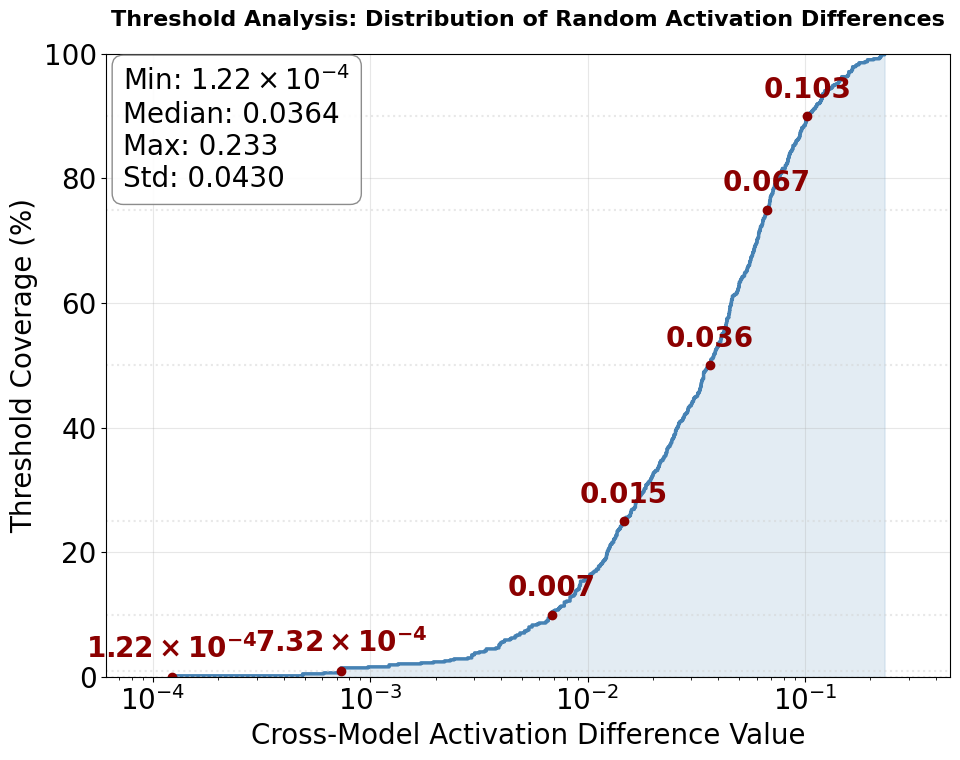


CUMULATIVE DISTRIBUTION ANALYSIS

Total samples: 625

Summary Statistics for Max of Min values:
--------------------------------------------------
Minimum value: $1.22 \times 10^{-4}$
Maximum value: 0.233
Mean value: 0.047828
Median value: 0.0364
Standard deviation: 0.0430

Key Percentiles:
--------------------------------------------------
 1th percentile: $\mathbf{7.32 \times 10^{-4}}$
 5th percentile: 0.0039
10th percentile: 0.0068
25th percentile: 0.0146
50th percentile: 0.0364
75th percentile: 0.0668
90th percentile: 0.103
95th percentile: 0.136
99th percentile: 0.194


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def format_percentile_not_bold(val):
    if val < 0.001:
        exponent = int(np.floor(np.log10(abs(val))))
        mantissa = val / (10 ** exponent)
        return f"${mantissa:.2f} \\times 10^{{{exponent}}}$"
    elif val < 0.1:
        return f"{val:.4f}"
    else:
        return f"{val:.3f}"

def format_percentile(val):
    if val < 0.001:
        exponent = int(np.floor(np.log10(abs(val))))
        mantissa = val / (10 ** exponent)
        return f"$\\mathbf{{{mantissa:.2f} \\times 10^{{{exponent}}}}}$"
    elif val < 0.1:
        return f"{val:.4f}"
    else:
        return f"{val:.3f}"
    
# Load the data
df = pd.read_csv('llama2_activation_diff_results.csv')
df.dropna(axis=0, inplace=True)

# Calculate max of min across all layers
min_columns = [f'layer_{i}_random_abs_diff' for i in range(32)]  # All 32 layers
df['all_layers_max_of_min'] = df[min_columns].min(axis=1)

# Set global font size
plt.rcParams.update({'font.size': 20})

# Create the cumulative distribution plot
plt.figure(figsize=(10, 8))

# Get the max_of_min values and sort them
values = df['all_layers_max_of_min'].values
sorted_data = np.sort(values)
y_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data) * 100

# Main curve - step plot with fill
plt.step(sorted_data, y_values, where='post', color='steelblue', linewidth=2.5)
plt.fill_between(sorted_data, y_values, alpha=0.15, color='steelblue', step='post')

# Calculate median
median_value = np.median(sorted_data)

# Key percentiles to highlight
key_percentiles = [0, 1, 10, 25, 50, 75, 90]
for pct in key_percentiles:
    percentile_value = np.percentile(sorted_data, pct)
    plt.axhline(y=pct, color='lightgray', linestyle=':', alpha=0.5)
    plt.plot(percentile_value, pct, marker='o', color='darkred', markersize=6)
    
    # Format as decimal number with appropriate precision
    if percentile_value < 0.001:
        formatted_value = format_percentile(percentile_value)
    elif percentile_value < 0.1:
        formatted_value = f"{percentile_value:.3f}"
    else:
        formatted_value = f"{percentile_value:.3f}"
    
    plt.text(percentile_value, pct + 2, formatted_value, 
            color='darkred', ha='center', va='bottom', fontweight='bold', fontsize=20)

# Clean grid and labels
plt.grid(True, linestyle='-', alpha=0.3)
plt.title('Threshold Analysis: Distribution of Random Activation Differences', 
          fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Cross-Model Activation Difference Value', fontsize=20)
plt.ylabel('Threshold Coverage (%)', fontsize=20)

# Set log scale for x-axis to better show the range
plt.xscale('log')

# Better axis limits
plt.xlim(sorted_data.min() * 0.5, sorted_data.max() * 2)
plt.ylim(0, 100)

# Cleaner ticks
plt.yticks(np.arange(0, 101, 20))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Statistics box with decimal formatting
min_val = sorted_data.min()
max_val = sorted_data.max()
mean_val = np.mean(sorted_data)
std_val = np.std(sorted_data)

# Format statistics with LaTeX scientific notation for values < 0.001
def format_value_latex(val, threshold=0.001):
    if val < threshold:
        # Convert to scientific notation
        exponent = int(np.floor(np.log10(abs(val))))
        mantissa = val / (10 ** exponent)
        return f"${mantissa:.2f} \\times 10^{{{exponent}}}$"
    else:
        return f"{val:.4f}"

min_str = format_percentile_not_bold(min_val)
median_str = format_percentile_not_bold(median_value)
max_str = format_percentile_not_bold(max_val)
std_str = format_percentile_not_bold(std_val)

stats_text = (f"Min: {min_str}\n"
              f"Median: {median_str}\n" 
              f"Max: {max_str}\n"
              f"Std: {std_str}")


plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, fontsize=20,
        verticalalignment='top', horizontalalignment='left',
        bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.9, edgecolor='gray'))

plt.tight_layout()

# Save plot
save_path = 'DCA-SQ2.pdf'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

# Print detailed statistics with decimal formatting
print("\n" + "=" * 70)
print("CUMULATIVE DISTRIBUTION ANALYSIS")
print("=" * 70)
print(f"\nTotal samples: {len(values)}")

print("\n" + "=" * 70)
print("Summary Statistics for Max of Min values:")
print("-" * 50)
print(f"Minimum value: {min_str}")
print(f"Maximum value: {max_str}")
print(f"Mean value: {mean_val:.6f}")
print(f"Median value: {median_str}")
print(f"Standard deviation: {std_str}")

print("\n" + "=" * 70)
print("Key Percentiles:")
print("-" * 50)


for pct in [1, 5, 10, 25, 50, 75, 90, 95, 99]:
    percentile_value = np.percentile(sorted_data, pct)
    formatted_pct = format_percentile(percentile_value)
    print(f"{pct:2d}th percentile: {formatted_pct}")
